In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score


In [10]:
!rm -r machine-learning/
!git clone https://github.com/emineedagulsen/machine-learning-

rm: cannot remove 'machine-learning/': No such file or directory
fatal: destination path 'machine-learning-' already exists and is not an empty directory.


In [11]:
dataFrame = pd.read_csv('machine-learning-/csv/customer_staying_or_not.csv') # replace with your file

In [12]:
dataFrame.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
pd.set_option('display.max_columns', None) # print all columns
#print(dataFrame['CreditScore'])
X = dataFrame.iloc[:,3:13] # select relevant rows and columns to X (here for example columns 5,6,7,8,9,10 and 11)
y = dataFrame.iloc[:, -1] # select column(s) for y (here only the last column)
# Capital X and lower-case y comes from Linear Algebra. The input is often a 2D array (matrix, named X) while the output is often a 1D array (vector, named y)


In [14]:
X = pd.get_dummies(X) # convert ALL text-columns to categorical variables (One Hot encoding), e.g. gender, country etc. 
columnNames = list(X.columns) # grab column-names before converting to numpy array
X = X.values # convert from Pandas dataframe to numpy array
y = y.values # convert from Pandas dataframe to numpy array

In [15]:
print(X[0:5,:])

[[6.1900000e+02 4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0134888e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [6.0800000e+02 4.1000000e+01 1.0000000e+00 8.3807860e+04 1.0000000e+00
  0.0000000e+00 1.0000000e+00 1.1254258e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00]
 [5.0200000e+02 4.2000000e+01 8.0000000e+00 1.5966080e+05 3.0000000e+00
  1.0000000e+00 0.0000000e+00 1.1393157e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [6.9900000e+02 3.9000000e+01 1.0000000e+00 0.0000000e+00 2.0000000e+00
  0.0000000e+00 0.0000000e+00 9.3826630e+04 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [8.5000000e+02 4.3000000e+01 2.0000000e+00 1.2551082e+05 1.0000000e+00
  1.0000000e+00 1.0000000e+00 7.9084100e+04 0.0000000e+00 0.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00]]


In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X) # calculate mean and standard deviation and convert dataframe to numpy array

In [17]:
print(X[0:5,:])

[[-0.32622142  0.29351742 -1.04175968 -1.22584767 -0.91158349  0.64609167
   0.97024255  0.02188649  0.99720391 -0.57873591 -0.57380915  1.09598752
  -1.09598752]
 [-0.44003595  0.19816383 -1.38753759  0.11735002 -0.91158349 -1.54776799
   0.97024255  0.21653375 -1.00280393 -0.57873591  1.74273971  1.09598752
  -1.09598752]
 [-1.53679418  0.29351742  1.03290776  1.33305335  2.52705662  0.64609167
  -1.03067011  0.2406869   0.99720391 -0.57873591 -0.57380915  1.09598752
  -1.09598752]
 [ 0.50152063  0.00745665 -1.38753759 -1.22584767  0.80773656 -1.54776799
  -1.03067011 -0.10891792  0.99720391 -0.57873591 -0.57380915  1.09598752
  -1.09598752]
 [ 2.06388377  0.38887101 -1.04175968  0.7857279  -0.91158349  0.64609167
   0.97024255 -0.36527578 -1.00280393 -0.57873591  1.74273971  1.09598752
  -1.09598752]]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42 )
# random_state set to some value will provide same output


In [19]:
model = Sequential()
model.add(Dense(4,activation='relu')) # 4 outputs. It will automatically adapt to number inputs
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) # Final output node for prediction. In this case, only one output neuron

adam = Adam(learning_rate=0.001) 
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  


In [20]:
model.fit(X_train,y_train,epochs=100, verbose=1)  # does the actual WORK !. verbose=1 will show output. 0 = no output.



Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 1.2236 - accuracy: 0.7945
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7920
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7914
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7926
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4671 - accuracy: 0.7952
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7965
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7990
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8015
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.8044
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4331 - accura

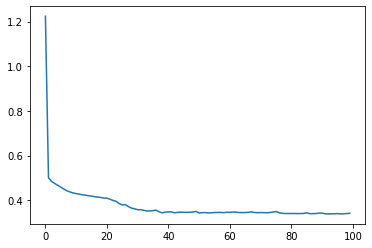

In [21]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)



In [22]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # creates a new array with true/false based on the boolean test

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1532   75]
 [ 204  189]]


In [23]:
#print(columnNames) # first print column names, so you can enter new data in the correct columns
new_value = [[120,24,3,200,0,1,0,55000,0,1,0,1,0]] # enter new data in 2D array. Only numbers + dummy variables. 
new_value = scaler.transform(new_value) # Don't forget to scale!
model.predict(new_value)


array([[1.4140011]], dtype=float32)

In [24]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [25]:
myModel = load_model('my_model.h5') # myModel is ready for predicting right away!

